## 데이터 확인

In [1]:
# 경로
csv_path = 'labels/data_grade_foruse.csv'
img_folder = 'input_nifti/'

In [2]:
import os
import pandas as pd

In [3]:
df = pd.read_csv(csv_path, index_col=0)
df

,Cerebral WM Hypointensities* Total Volume,Cerebral WM Hypointensities* Total Percent Of Icv,Cortical Gray Matter Total Percent Of Icv,GRADE,WMH_voxels,WMH_vol,wmhypo_vol
FOLDERNAME,,,,,,,
14090110_20180523_095025_MR,0.351,0.0249,30.7874,0,114.0,0.114000,0.351
14152551_20180129_085254_MR,1.510,0.1131,31.9052,1,1023.0,1.023000,1.510
15168092_20180223_091548_MR,2.625,0.1630,30.3495,1,1226.0,1.226000,2.625
16657951_20180529_103505_MR,1.270,0.0740,30.7348,0,1161.0,1.161000,1.270
16965739_20180419_103601_MR,1.415,0.0991,30.3336,1,2675.0,2.675000,1.415
...,...,...,...,...,...,...,...
32652530_20180629_083727_MR,2.477,0.1651,31.0558,1,2678.0,2.678000,2.477
15341183_20180807_112449_MR,4.154,0.2874,30.3052,2,4255.0,4.255000,4.154
49109786_20170207_084636_MR,1.911,0.1475,32.4799,1,1391.0,1.390482,1.911


In [4]:
# Fazekas scale 에서 deep white matter hyperintensity 는
#     0 = absent
#     1 = punctate foci
#     2 = beginning confluence
#     3 = large confluent areas

In [5]:
# 0 = absent
grade0 = df[df['GRADE']==0]['Cerebral WM Hypointensities* Total Percent Of Icv']

# 1 = punctate foci
grade1 = df[df['GRADE']==1]['Cerebral WM Hypointensities* Total Percent Of Icv']

# 2 = beginning confluence
grade2 = df[df['GRADE']==2]['Cerebral WM Hypointensities* Total Percent Of Icv']

# 3 = large confluent areas
grade3 = df[df['GRADE']==3]['Cerebral WM Hypointensities* Total Percent Of Icv']

In [6]:
grade0_mean = grade0.mean()
grade1_mean = grade1.mean()
grade2_mean = grade2.mean()
grade3_mean = grade3.mean()
grade0_mean, grade1_mean, grade2_mean, grade3_mean

(0.0436604705882353,
 0.1100954716981132,
 0.42039157894736856,
 1.0984736842105263)

In [7]:
samples = dict()

In [8]:
grade0_1 = grade0[grade0>=0.04]
grade0_2 = grade0_1[grade0_1<0.05]
samples["absent"] = grade0_2.sample(n=1, random_state=551)

grade1_1 = grade1[grade1>=0.11]
grade1_2 = grade1_1[grade1_1<0.13]
samples["punctate foci"] = grade1_2.sample(n=1, random_state=551)

grade2_1 = grade2[grade2>=0.41]
grade2_2 = grade2_1[grade2_1<0.44]
samples["beginning confluence"] = grade2_2.sample(n=1, random_state=551)

grade3_1 = grade3[grade3>=1.00]
grade3_2 = grade3_1[grade3_1<1.20]
samples["large confluent areas"] = grade3_2.sample(n=1, random_state=551)

In [9]:
samples

{'absent': FOLDERNAME
 45812174_20180524_094619_MR    0.0433
 Name: Cerebral WM Hypointensities* Total Percent Of Icv, dtype: float64,
 'punctate foci': FOLDERNAME
 49708602_20170804_075747_MR    0.1288
 Name: Cerebral WM Hypointensities* Total Percent Of Icv, dtype: float64,
 'beginning confluence': FOLDERNAME
 30367184_20180703_113806_MR    0.4378
 Name: Cerebral WM Hypointensities* Total Percent Of Icv, dtype: float64,
 'large confluent areas': FOLDERNAME
 33685379_20201118_085742_MR    1.0879
 Name: Cerebral WM Hypointensities* Total Percent Of Icv, dtype: float64}

In [10]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [11]:
img_nifti = 'input_nifti/'
img_np = 'img_npy/'

absent


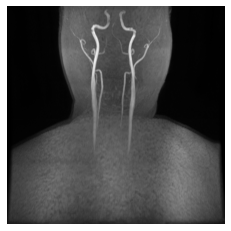

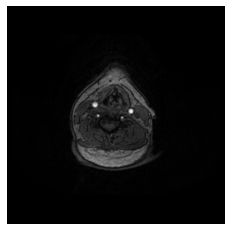

punctate foci


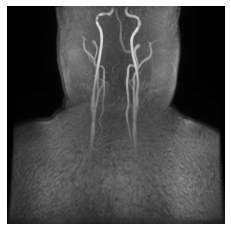

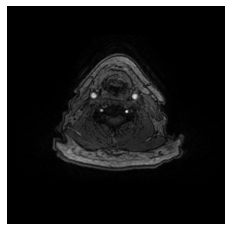

beginning confluence


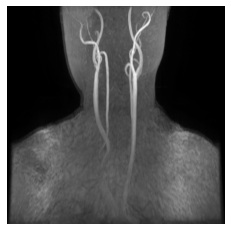

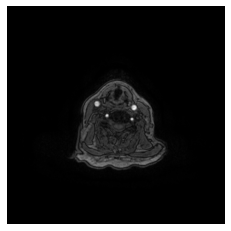

large confluent areas


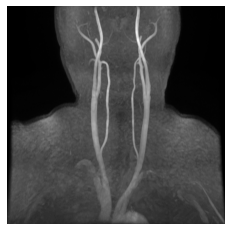

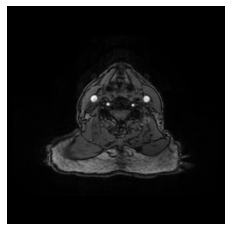

In [12]:
from scipy.ndimage import zoom, rotate

for key, value in samples.items():
    filename = img_nifti + value.index[0] + '/'
    filename = filename + os.listdir(filename)[0]
    
    img = nib.load(filename)
    img = img.get_fdata()
        
    mip = np.max(img, axis=1)
    mip = zoom(mip, (1,512/mip.shape[1]))
    mip = rotate(mip, 90)
    print(key)
    plt.imshow(mip, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()
    
    axial = img[:, :, img.shape[2]//2]
    axial = rotate(axial, 90)
    plt.imshow(axial, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

(170, 84, 98)
absent


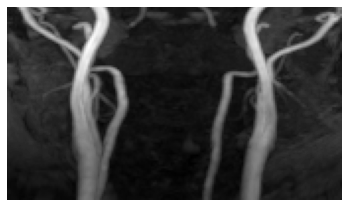

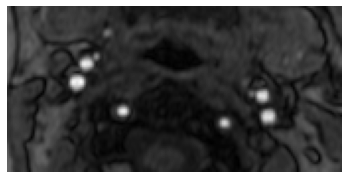

(170, 84, 98)
punctate foci


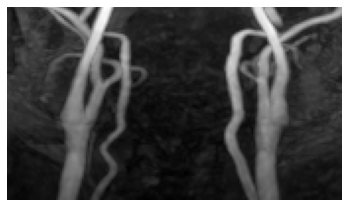

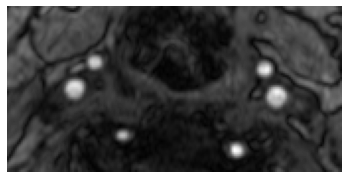

(170, 84, 98)
beginning confluence


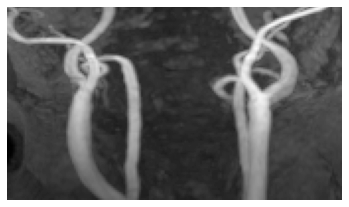

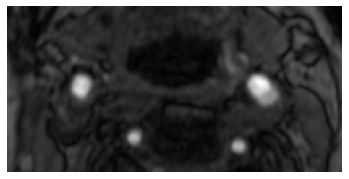

(170, 84, 98)
large confluent areas


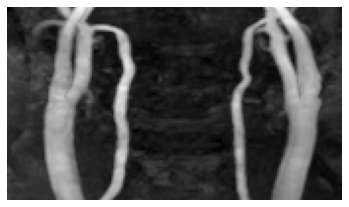

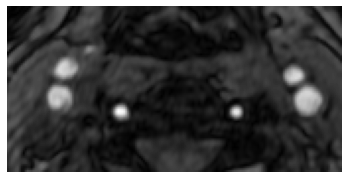

In [13]:
for key, value in samples.items():
    filename = img_np + value.index[0] + '.npy'
    
    img = np.load(filename)
    print(img.shape)
        
    mip = np.max(img, axis=1)
    mip = rotate(mip, 90)
    print(key)
    plt.imshow(mip, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()
    
    axial = img[:, :, img.shape[2]//2]
    axial = rotate(axial, 90)
    plt.imshow(axial, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

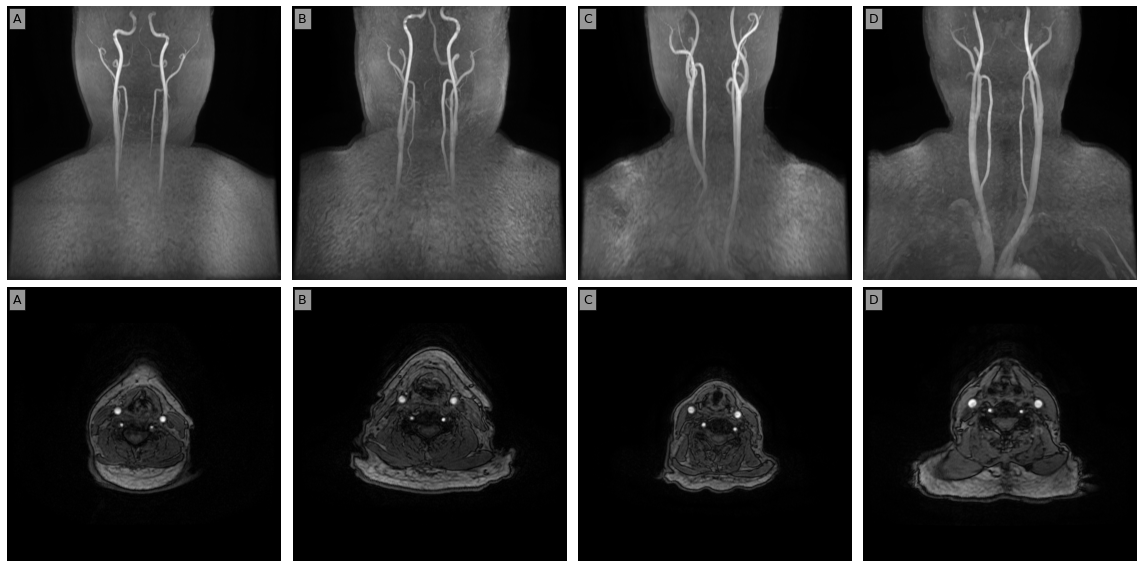

In [14]:
i = 0
plt.figure(figsize=(16,8))
for key, value in samples.items():
    filename = img_nifti + value.index[0] + '/'
    filename = filename + os.listdir(filename)[0]
    
    img = nib.load(filename)
    img = img.get_fdata()
        
    mip = np.max(img, axis=1)
    mip = zoom(mip, (1,512/mip.shape[1]))
    mip = rotate(mip, 90)

    plt.subplot(2,4,i+1)
    plt.text(10,10, chr(ord('A')+i),
           horizontalalignment='left',
           verticalalignment='top',
           bbox=dict(facecolor='white', alpha=0.6),
           fontsize=12.5)
    plt.imshow(mip, cmap='gray')
    plt.axis('off')
    
    plt.subplot(2,4,i+5)
    plt.text(10,10, chr(ord('A')+i),
       horizontalalignment='left',
       verticalalignment='top',
       bbox=dict(facecolor='white', alpha=0.6),
       fontsize=12.5)
    axial = img[:, :, img.shape[2]//2]
    axial = rotate(axial, 90)
    plt.imshow(axial, cmap='gray')
    plt.axis('off')
#     plt.show()
#     plt.close()
    
    i+=1
plt.tight_layout()
plt.show()
plt.close()

(170, 84, 98)
(170, 84, 98)
(170, 84, 98)
(170, 84, 98)


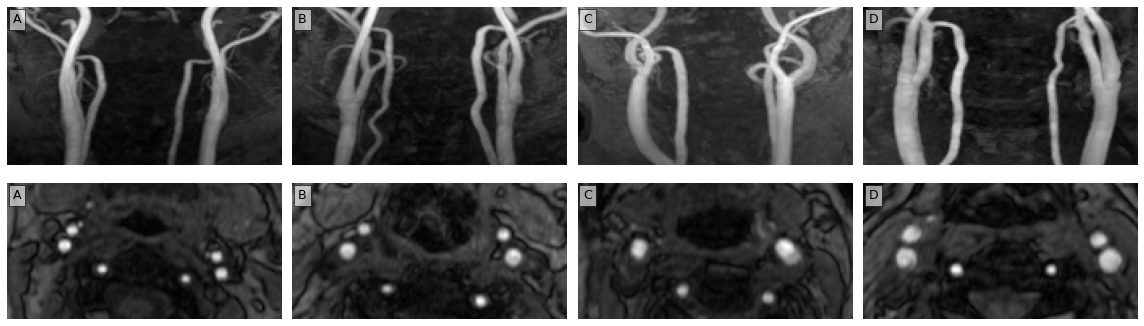

In [17]:
i = 0
plt.figure(figsize=(16,5))
for key, value in samples.items():
    filename = img_np + value.index[0] + '.npy'
    
    img = np.load(filename)
    print(img.shape)
        
    mip = np.max(img, axis=1)
    mip = rotate(mip, 90)

    plt.subplot(2,4,i+1)
    plt.text(3,3, chr(ord('A')+i),
           horizontalalignment='left',
           verticalalignment='top',
           bbox=dict(facecolor='white', alpha=0.6),
           fontsize=12.5)
    plt.imshow(mip, cmap='gray')
    plt.axis('off')
    
    plt.subplot(2,4,i+5)
    plt.text(3,3, chr(ord('A')+i),
       horizontalalignment='left',
       verticalalignment='top',
       bbox=dict(facecolor='white', alpha=0.6),
       fontsize=12.5)
    axial = img[:, :, img.shape[2]//2]
    axial = rotate(axial, 90)
    plt.imshow(axial, cmap='gray')
    plt.axis('off')
    
    i+=1
plt.tight_layout()
plt.show()
plt.close()

In [6]:
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
img_nifti = 'input_nifti/'
label_name = 'FL_WMH_VOL_icv'
label_dir = 'labels/data_975.csv'

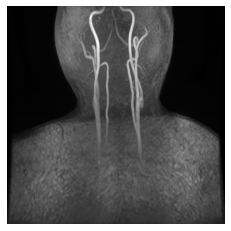

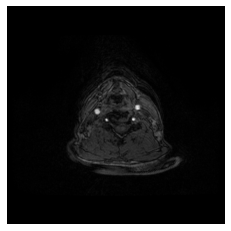

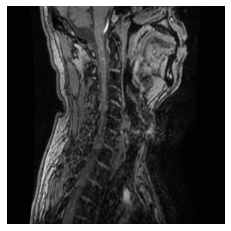

In [12]:
from scipy.ndimage import zoom, rotate

df = pd.read_csv(label_dir, index_col=0)[label_name]
filenames = df.index
images = []
for i, index in enumerate(filenames):
    file_name = img_nifti + index + '.nii.gz'
    
    img = nib.load(file_name)
    img = img.get_fdata()
        
    mip = np.max(img, axis=1)
    mip = zoom(mip, (1,512/mip.shape[1]))
    mip = rotate(mip, 90)
    plt.imshow(mip, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()
    
    axial = img[:, :, img.shape[2]//2]
    axial = rotate(axial, 90)
    plt.imshow(axial, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()
    
    sagittal = img[img.shape[0]//2, :, :]
    sagittal = zoom(sagittal, (1,512/sagittal.shape[1]))
    sagittal = rotate(sagittal, 90)
    plt.imshow(sagittal, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()
    
    break

In [16]:
df = pd.read_csv(label_dir, index_col=0)
df

FOLDERNAME
14090110_20180523_095025_MR    0.023929
14152551_20180129_085254_MR    0.257909
15168092_20180223_091548_MR    0.387687
16657951_20180529_103505_MR    0.143494
16965739_20180419_103601_MR    0.623429
Name: FL_WMH_VOL_icv, dtype: float64
